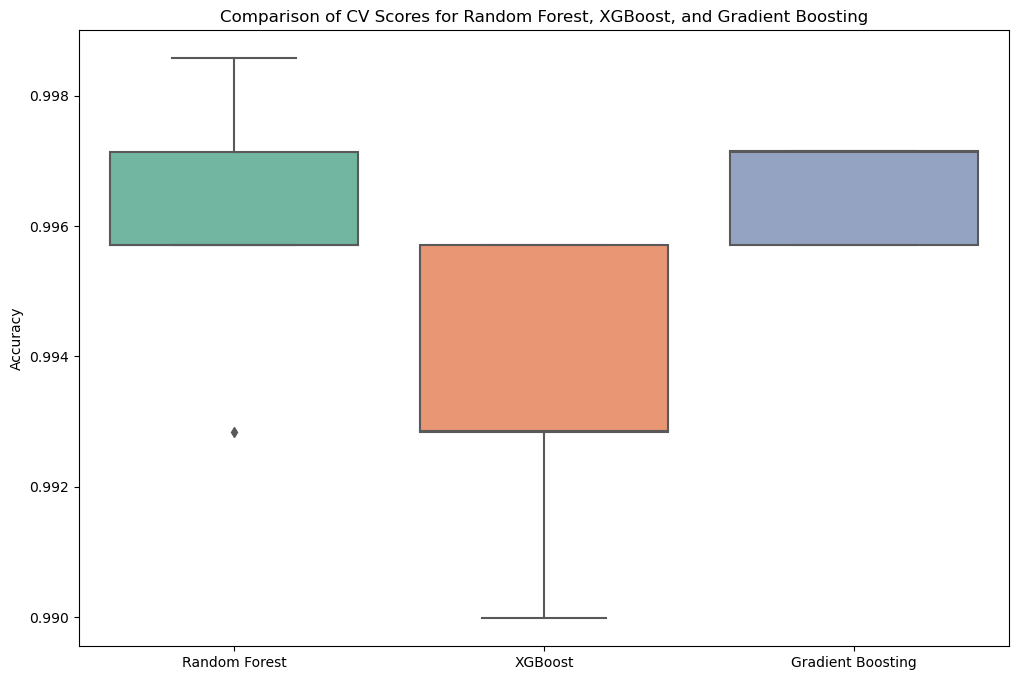

(0.9959959125281014, 0.9934224402207233, 0.9965681585939097)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Load the dataset for classification
data_classification = pd.read_csv('clustering_res.csv')

# Prepare the features and target
X = data_classification.drop(['Cluster', 'CustomerID'], axis=1)  # Exclude 'CustomerID' as it's not a feature
y = data_classification['Cluster']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_estimators=100, tree_method='hist')
gb_clf = GradientBoostingClassifier(random_state=42)

# Perform cross-validation
cv_scores_rf = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_xgb = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_gb = cross_val_score(gb_clf, X_train, y_train, cv=5, scoring='accuracy')

# Visualization of the cross-validation scores
plt.figure(figsize=(12, 8))
sns.boxplot(data=[cv_scores_rf, cv_scores_xgb, cv_scores_gb], palette='Set2')
plt.xticks([0, 1, 2], ['Random Forest', 'XGBoost', 'Gradient Boosting'])
plt.title('Comparison of CV Scores for Random Forest, XGBoost, and Gradient Boosting')
plt.ylabel('Accuracy')

plt.show()
(cv_scores_rf.mean(), cv_scores_xgb.mean(), cv_scores_gb.mean())
